##Contexto do Desafio

Ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento.
Para isso, você analisará dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store.
O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

### Importação dos dados



In [170]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


##Conhecendo o Dataset
###Estrutura dos Dados- O dataset inclui as seguintes informações:

Produto e Categoria: Itens vendidos e suas classificações.

Preço e Frete: Valores das vendas e custos associados.

Data de Compra e Local: Informações temporais e geográficas.

Avaliação da Compra: Feedback dos clientes.

Tipo de Pagamento e Parcelas: Métodos utilizados pelos clientes.

Coordenadas Geográficas: Localização das transações.

In [171]:
print(f"Loja 1: {len(loja)} linhas")
print(f"Loja 2: {len(loja2)} linhas")
print(f"Loja 3: {len(loja3)} linhas")
print(f"Loja 4: {len(loja4)} linhas")

Loja 1: 2359 linhas
Loja 2: 2359 linhas
Loja 3: 2359 linhas
Loja 4: 2358 linhas


In [172]:
print(loja.shape, loja2.shape, loja3.shape, loja4.shape)  # Confirma tamanho de cada tabela antes da união

(2359, 12) (2359, 12) (2359, 12) (2358, 12)


In [173]:
produtos_loja1 = set(loja["Produto"])
produtos_loja4 = set(loja4["Produto"])

diferenca = produtos_loja1 - produtos_loja4
print("Produtos que estão na Loja 1, mas faltam na Loja 4:")
print(diferenca)

Produtos que estão na Loja 1, mas faltam na Loja 4:
set()


####Observação
A Loja 4 não tem um produto faltando em relação às outras lojas. O único registro a menos pode ser um erro no banco de dados ou uma venda que não foi registrada corretamente.
A diferença de faturamento da Loja 4 não é causada pela ausência de produtos, mas sim pelos preços médios mais baixos, como vimos antes.


### Criação DataFrame Unificado

In [174]:
import pandas as pd

# Criando uma tabela única a partir das tabelas individuais
loja["Lojas"] = "Loja 1"
loja2["Lojas"] = "Loja 2"
loja3["Lojas"] = "Loja 3"
loja4["Lojas"] = "Loja 4"

df_unificado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print(df_unificado.head())  # Verifica se a coluna 'Lojas' está correta # Confirma se foi adicionada
pd.set_option('display.max_rows', None)



                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon   Lojas  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

In [175]:
# Exibir as primeiras linhas para conferir
print(df_unificado.shape)

(9435, 13)


In [176]:
pd.set_option("display.max_rows", None)  # Exibe todas as linhas
pd.set_option("display.max_columns", None)  # Exibe todas as colunas


In [177]:
print(df_unificado.columns)  # Lista os nomes das colunas no dataframe consolidado

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Lojas'],
      dtype='object')


#1. Análise do faturamento


In [178]:
print(type(loja))  # Isso mostrará se `loja` é um DataFrame ou uma string

<class 'pandas.core.frame.DataFrame'>


###Faturamento total por loja
Mostra o total de receita gerada por cada loja.

In [179]:
faturamento_total_por_loja = df_unificado.groupby("Lojas")["Preço"].sum()
print("Faturamento Total por Loja:")
print(faturamento_total_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))



Faturamento Total por Loja:
Lojas
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Preço, dtype: object


###Faturamento médio por loja

In [180]:
faturamento_medio_por_loja = df_unificado.groupby("Lojas")["Preço"].mean()
print("Faturamento Médio por Loja:")
print(faturamento_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))

Faturamento Médio por Loja:
Lojas
Loja 1    R$ 650,49
Loja 2    R$ 630,97
Loja 3    R$ 620,61
Loja 4    R$ 587,15
Name: Preço, dtype: object


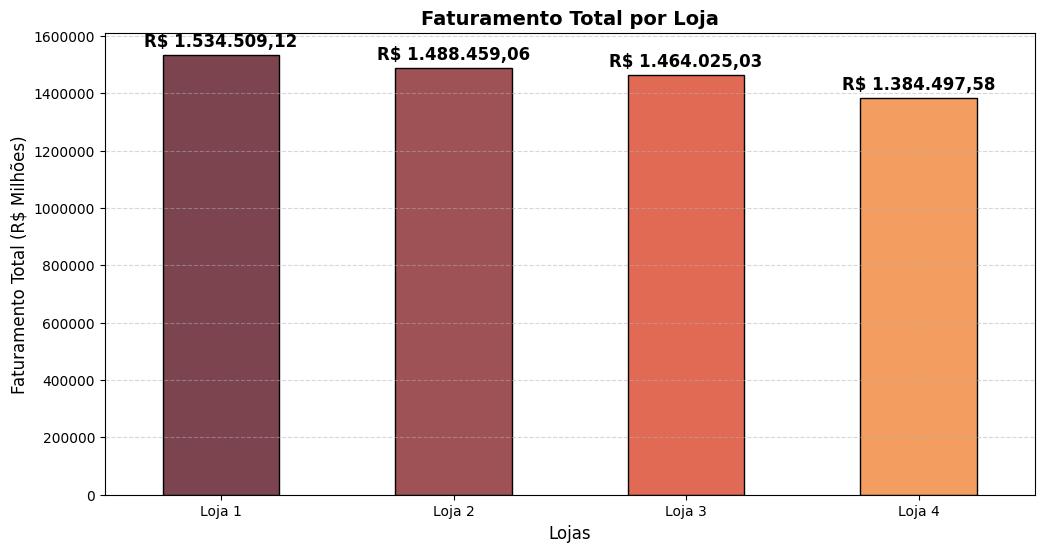

In [181]:
import matplotlib.pyplot as plt

# Configurando o tamanho do gráfico antes de plotar
fig, ax = plt.subplots(figsize=(12, 6))

# Cores personalizadas
cores = ["#7C444F", "#9F5255", "#E16A54", "#F39E60"]

# Criando gráfico de barras
faturamento_total_por_loja.plot(kind="bar", color=cores, edgecolor="black", ax=ax)

# Adicionando rótulos nas barras
for i, v in enumerate(faturamento_total_por_loja):
    ax.text(i, v + (v * 0.02), f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), ha="center", fontsize=12, fontweight="bold")

# Ajustes no layout do gráfico
plt.title("Faturamento Total por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento Total (R$ Milhões)", fontsize=12)
plt.ticklabel_format(style="plain", axis="y")  # Evita notação científica
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()

Por meio do grafico é possivel comparar a performance geral de cada loja,  mostra qual loja gerou mais receita no período. Isso é útil para entender qual unidade é mais lucrativa.



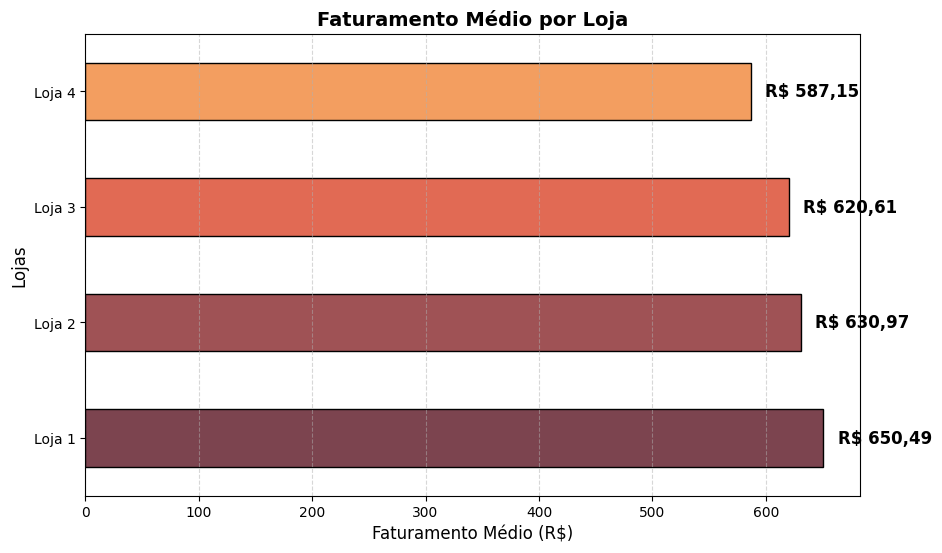

In [182]:
import matplotlib.pyplot as plt

# Criando o gráfico
faturamento_medio_por_loja = faturamento_medio_por_loja.astype(float)  # Garante que os valores são numéricos
ax = faturamento_medio_por_loja.plot(kind="barh", color=["#7C444F","#9F5255", "#E16A54","#F39E60"], figsize=(10, 6), edgecolor="black")

# Adicionando rótulos nas barras
for i, v in enumerate(faturamento_medio_por_loja):
    ax.text(v + (v * 0.02), i, f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), va="center", fontsize=12, fontweight="bold")

plt.title("Faturamento Médio por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Médio (R$)", fontsize=12)
plt.ylabel("Lojas", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()

###Analise do grafico:
Diferença de ticket médio entre as lojas → Algumas lojas têm valores médios mais altos, indicando que seus clientes gastam mais por compra.
Comparação direta → O formato horizontal permite que vejamos rapidamente qual loja tem maior faturamento médio e qual tem o menor.
Impacto na estratégia → Lojas com ticket médio menor podem estar vendendo produtos mais baratos ou atraindo um público diferente.


###Margem de lucro por loja

In [183]:
custo_total_por_loja = df_unificado.groupby("Lojas")["Frete"].sum()
margem_lucro_por_loja = (faturamento_total_por_loja - custo_total_por_loja) / faturamento_total_por_loja * 100
print(margem_lucro_por_loja)

Lojas
Loja 1    94.666831
Loja 2    94.671391
Loja 3    94.670674
Loja 4    94.672734
dtype: float64


# 2. Vendas por Categoria


###Quantidade vendas para cada categoria dentro de cada loja

In [184]:
produtos_vendidos_por_categoria = df_unificado.groupby(["Lojas", "Categoria do Produto"])["Produto"].count().reset_index()
produtos_vendidos_por_categoria.rename(columns={"Produto": "Quantidade_Vendas"}, inplace=True)
print(produtos_vendidos_por_categoria)

categorias_mais_populares = produtos_vendidos_por_categoria.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])
print(categorias_mais_populares.groupby("Lojas").head(1))  # Mostra a categoria mais vendida por loja

     Lojas   Categoria do Produto  Quantidade_Vendas
0   Loja 1             brinquedos                324
1   Loja 1       eletrodomesticos                312
2   Loja 1            eletronicos                448
3   Loja 1        esporte e lazer                284
4   Loja 1  instrumentos musicais                182
5   Loja 1                 livros                173
6   Loja 1                 moveis                465
7   Loja 1  utilidades domesticas                171
8   Loja 2             brinquedos                313
9   Loja 2       eletrodomesticos                305
10  Loja 2            eletronicos                422
11  Loja 2        esporte e lazer                275
12  Loja 2  instrumentos musicais                224
13  Loja 2                 livros                197
14  Loja 2                 moveis                442
15  Loja 2  utilidades domesticas                181
16  Loja 3             brinquedos                315
17  Loja 3       eletrodomesticos             

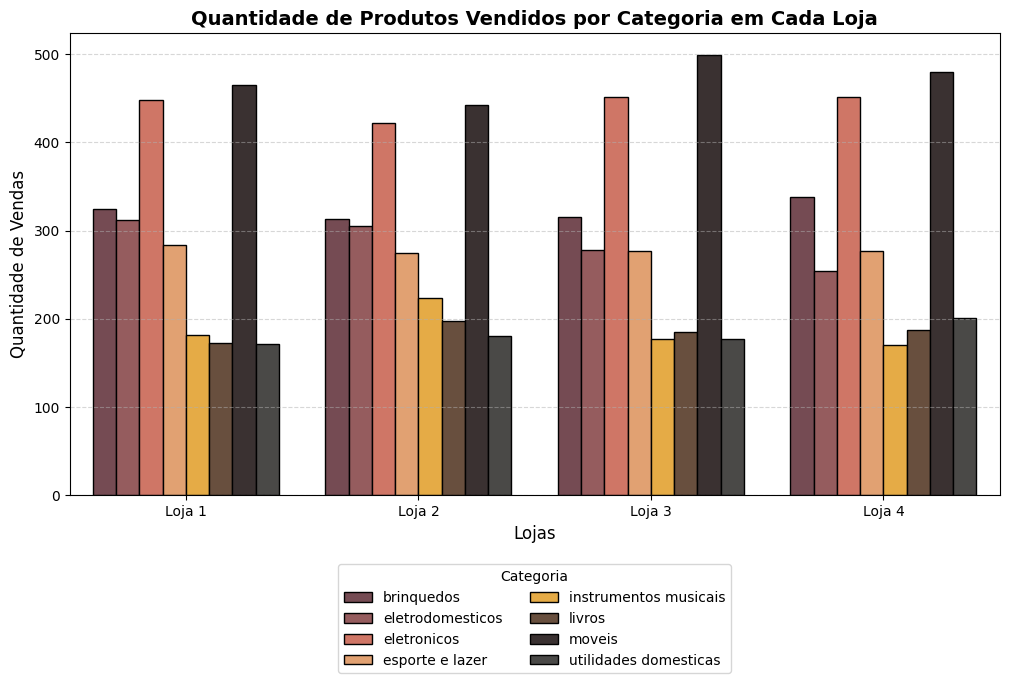

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=produtos_vendidos_por_categoria, x="Lojas", y="Quantidade_Vendas", hue="Categoria do Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C","#6F4E37","#3B3030","#4A4947"], edgecolor="black", width=0.8)

plt.title("Quantidade de Produtos Vendidos por Categoria em Cada Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Categoria", loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

###Preço médio por categoria para cada loja


In [186]:
preco_medio_por_categoria = df_unificado.groupby(["Lojas", "Categoria do Produto"])["Preço"].mean()
preco_medio_por_categoria = preco_medio_por_categoria.apply(lambda x: f"R$ {x:,.2f}")
print(preco_medio_por_categoria)

Lojas   Categoria do Produto 
Loja 1  brinquedos                  R$ 74.05
        eletrodomesticos         R$ 1,554.21
        eletronicos              R$ 1,278.26
        esporte e lazer            R$ 184.46
        instrumentos musicais      R$ 668.86
        livros                      R$ 67.71
        moveis                     R$ 538.02
        utilidades domesticas       R$ 99.01
Loja 2  brinquedos                  R$ 67.93
        eletrodomesticos         R$ 1,523.80
        eletronicos              R$ 1,298.04
        esporte e lazer            R$ 168.46
        instrumentos musicais      R$ 624.94
        livros                      R$ 68.30
        moveis                     R$ 532.21
        utilidades domesticas      R$ 108.63
Loja 3  brinquedos                  R$ 82.12
        eletrodomesticos         R$ 1,579.08
        eletronicos              R$ 1,214.41
        esporte e lazer            R$ 171.32
        instrumentos musicais      R$ 582.91
        livros           

# 3. Média de Avaliação das Lojas

In [187]:
media_avaliacoes_por_loja = df_unificado.groupby("Lojas")["Avaliação da compra"].mean().reset_index()
media_avaliacoes_por_loja.rename(columns={"Avaliação da compra": "Média_Avaliações"}, inplace=True)

print(media_avaliacoes_por_loja)

    Lojas  Média_Avaliações
0  Loja 1          3.976685
1  Loja 2          4.037304
2  Loja 3          4.048326
3  Loja 4          3.995759


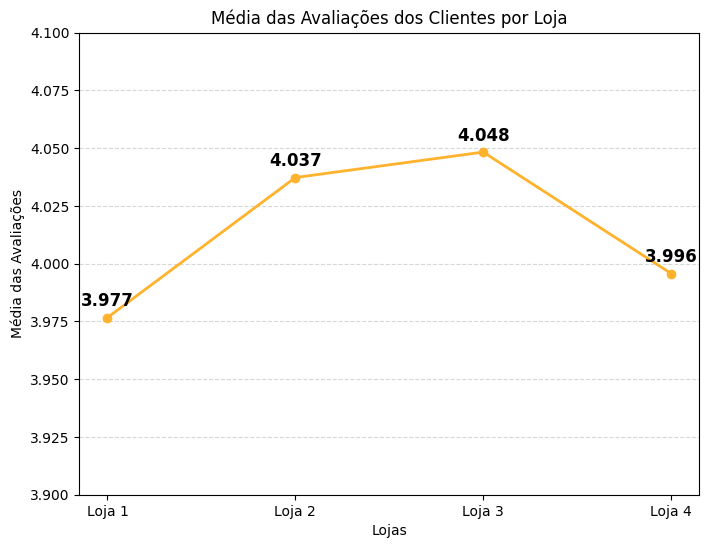

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Criando o gráfico de linhas
plt.plot(media_avaliacoes_por_loja["Lojas"], media_avaliacoes_por_loja["Média_Avaliações"], marker="o", linestyle="-", color="#FFB22C", linewidth=2)

plt.xlabel("Lojas")
plt.ylabel("Média das Avaliações")
plt.title("Média das Avaliações dos Clientes por Loja")
plt.ylim(3.9, 4.1)  # Ajusta escala para focar nas diferenças sutis
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir os valores nos pontos do gráfico
for i, v in enumerate(media_avaliacoes_por_loja["Média_Avaliações"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [189]:
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])

mais_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(1)  # Produto mais vendido por loja
menos_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(1)  # Produto menos vendido por loja

print("Mais vendidos:")
print(mais_vendidos_por_loja)
print("\nMenos vendidos:")
print(menos_vendidos_por_loja)


Mais vendidos:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
79   Loja 2  Iniciando em programação                 65
134  Loja 3             Kit banquetas                 57
161  Loja 4                  Cama box                 62

Menos vendidos:
      Lojas            Produto  Quantidade_Vendas
26   Loja 1            Headset                 33
82   Loja 2  Jogo de tabuleiro                 32
105  Loja 3   Blocos de montar                 35
178  Loja 4           Guitarra                 33


In [190]:
# Agrupar e contar vendas de produtos por loja
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Ordenar por Loja e quantidade de vendas
produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])

# Selecionar os 5 mais vendidos por loja
top_5_mais_vendidos = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(3)

# Exibir os resultados
print("Top 5 produtos mais vendidos por loja:")
print(top_5_mais_vendidos)

Top 5 produtos mais vendidos por loja:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
37   Loja 1               Micro-ondas                 60
47   Loja 1             TV Led UHD 4K                 60
79   Loja 2  Iniciando em programação                 65
88   Loja 2               Micro-ondas                 62
52   Loja 2                   Bateria                 61
134  Loja 3             Kit banquetas                 57
111  Loja 3                 Cama king                 56
138  Loja 3            Mesa de jantar                 56
161  Loja 4                  Cama box                 62
173  Loja 4                  Faqueiro                 59
162  Loja 4                 Cama king                 56


In [191]:
# Selecionar os 5 menos vendidos por loja
top_5_menos_vendidos = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(3)

# Exibir os resultados
print("Top 5 produtos menos vendidos por loja:")
print(top_5_menos_vendidos)

Top 5 produtos menos vendidos por loja:
      Lojas            Produto  Quantidade_Vendas
41   Loja 1  Panela de pressão                 35
11   Loja 1       Celular ABXY                 33
26   Loja 1            Headset                 33
78   Loja 2         Impressora                 34
87   Loja 2     Mesa de jantar                 34
82   Loja 2  Jogo de tabuleiro                 32
139  Loja 3        Micro-ondas                 36
140  Loja 3            Mochila                 36
105  Loja 3   Blocos de montar                 35
202  Loja 4             Violão                 37
177  Loja 4      Guarda roupas                 34
178  Loja 4           Guitarra                 33


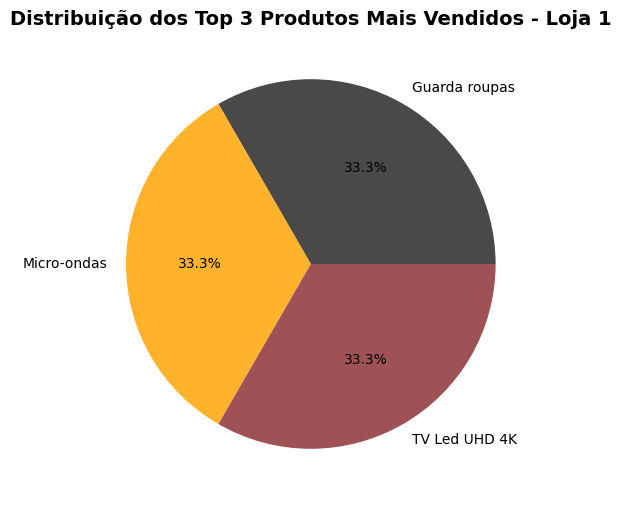

<Figure size 640x480 with 0 Axes>

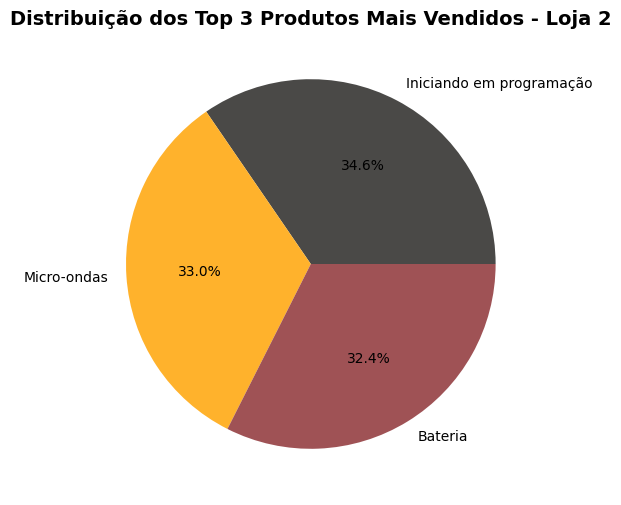

<Figure size 640x480 with 0 Axes>

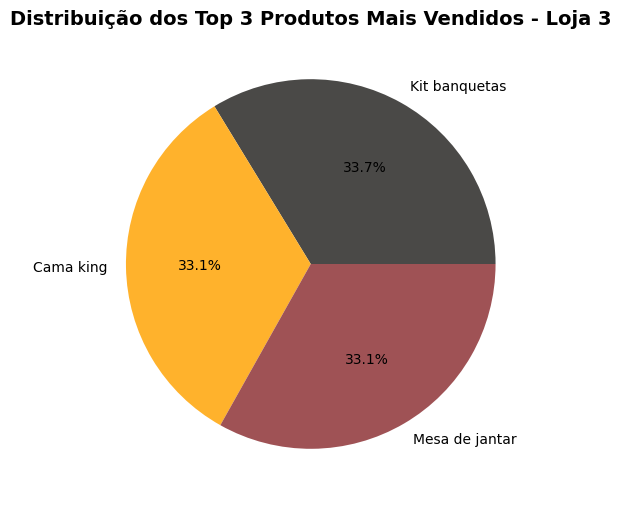

<Figure size 640x480 with 0 Axes>

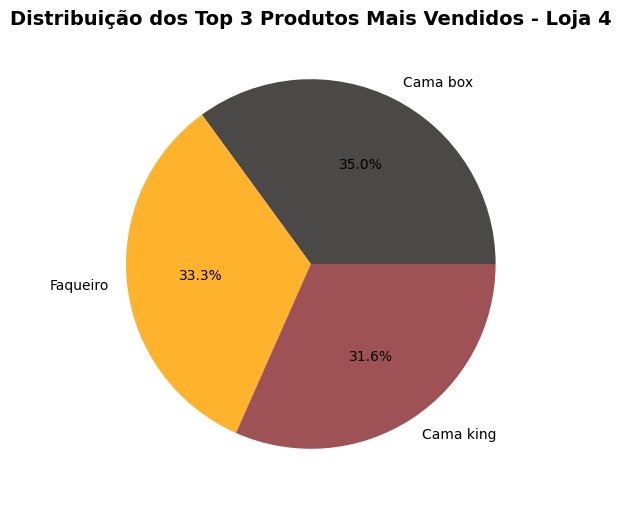

<Figure size 640x480 with 0 Axes>

In [192]:
import matplotlib.pyplot as plt

# Criar gráficos de pizza para cada loja
for loja in top_5_mais_vendidos["Lojas"].unique():
    dados_loja = top_5_mais_vendidos[top_5_mais_vendidos["Lojas"] == loja]

    plt.figure(figsize=(6, 6))  # Ajustar tamanho
    plt.pie(dados_loja["Quantidade_Vendas"], labels=dados_loja["Produto"], autopct="%1.1f%%", colors=["#4A4947","#FFB22C","#9F5255"])

    plt.title(f"Distribuição dos Top 3 Produtos Mais Vendidos - {loja}", fontsize=14, fontweight="bold")
    plt.show()
    plt.savefig("Distribuição_dos_Top_3Mais_Vendidos.png")

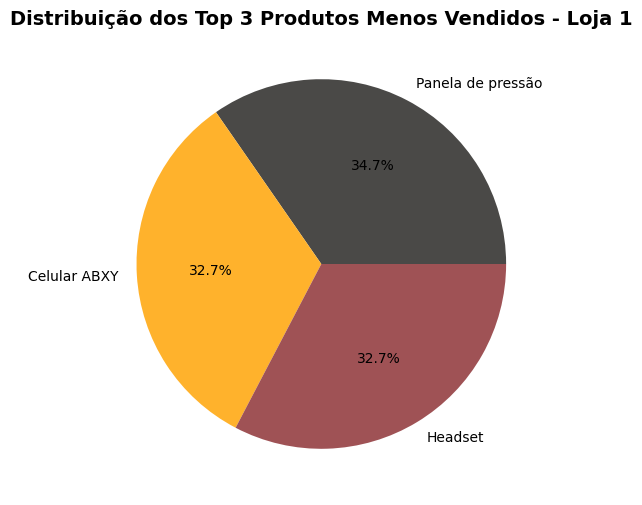

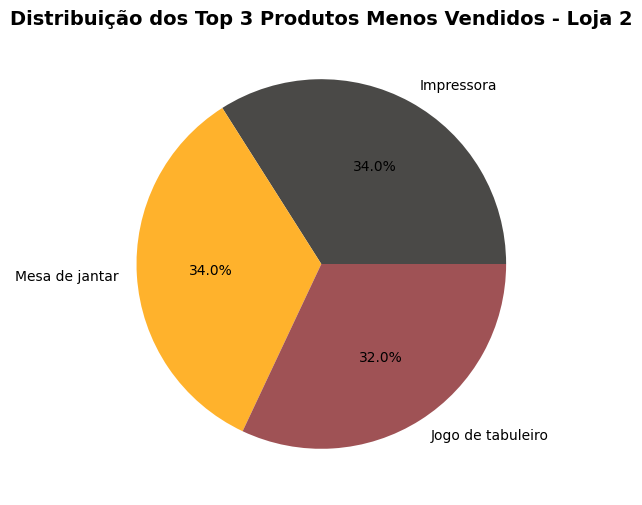

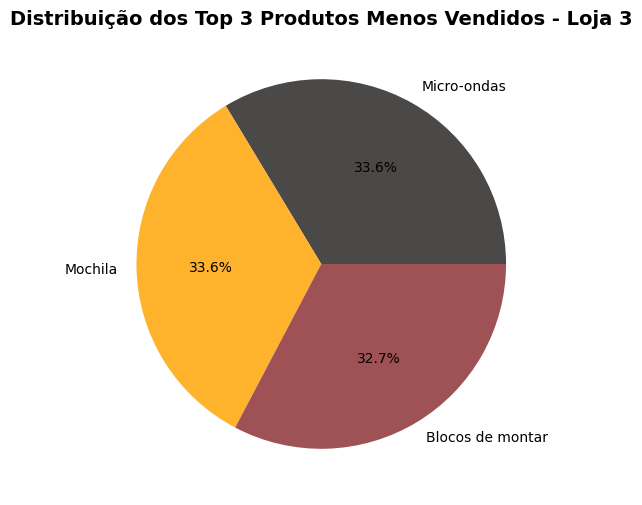

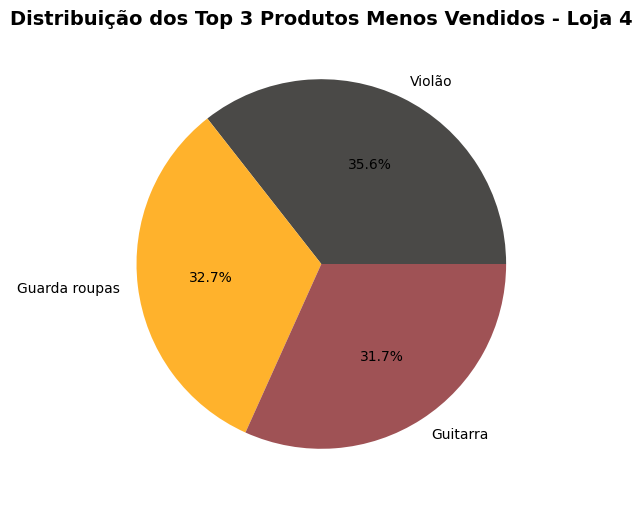

In [193]:
import matplotlib.pyplot as plt

# Criar gráficos de pizza para cada loja
for loja in top_5_menos_vendidos["Lojas"].unique():
    dados_loja = top_5_menos_vendidos[top_5_menos_vendidos["Lojas"] == loja]

    plt.figure(figsize=(6, 6))  # Ajustar tamanho
    plt.pie(dados_loja["Quantidade_Vendas"], labels=dados_loja["Produto"], autopct="%1.1f%%", colors=["#4A4947","#FFB22C","#9F5255"])

    plt.title(f"Distribuição dos Top 3 Produtos Menos Vendidos - {loja}", fontsize=14, fontweight="bold")
    plt.show()

# 5. Frete Médio por Loja


Pelos valores apresentados, os custos médios de frete por loja são relativamente próximos, sem grandes discrepâncias. A diferença entre a loja com maior custo de 34,69 e a loja com menor custo de 31,27é de aproximadamente R$3,41, o que indica uma variação pequena e consistente.



In [194]:
custo_medio_frete_por_loja = df_unificado.groupby("Lojas")["Frete"].mean().reset_index()
custo_medio_frete_por_loja.rename(columns={f"Frete": "Custo_Médio_Frete:"}, inplace=True)
custo_medio_frete_por_loja["Custo_Médio_Frete:"] = custo_medio_frete_por_loja["Custo_Médio_Frete:"].apply(lambda x: f"R$ {x:,.2f}")

print(custo_medio_frete_por_loja)


    Lojas Custo_Médio_Frete:
0  Loja 1           R$ 34.69
1  Loja 2           R$ 33.62
2  Loja 3           R$ 33.07
3  Loja 4           R$ 31.28


In [195]:
import pandas as pd

# Criar tabela formatada com pandas
from IPython.display import display

display(custo_medio_frete_por_loja.style.set_caption("Custo Médio de Frete por Loja")
                                      .set_properties(**{'text-align': 'center'})
                                      .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))


from tabulate import tabulate

print(tabulate(custo_medio_frete_por_loja, headers="keys", tablefmt="pipe"))

,Lojas,Custo_Médio_Frete:
0,Loja 1,R$ 34.69
1,Loja 2,R$ 33.62
2,Loja 3,R$ 33.07
3,Loja 4,R$ 31.28


|    | Lojas   | Custo_Médio_Frete:   |
|---:|:--------|:---------------------|
|  0 | Loja 1  | R$ 34.69             |
|  1 | Loja 2  | R$ 33.62             |
|  2 | Loja 3  | R$ 33.07             |
|  3 | Loja 4  | R$ 31.28             |


###Usando as coordenadas geográficas para mapear as vendas e explorar padrões que possam influenciar o desempenho das lojas.

###  Criação do gráfico Lojas e localização de compras






Agrupar os dados por Lojas e localização de compras vai ajudar a visualizar quais regiões têm mais compradores para cada loja, revelando tendências e padrões de venda.


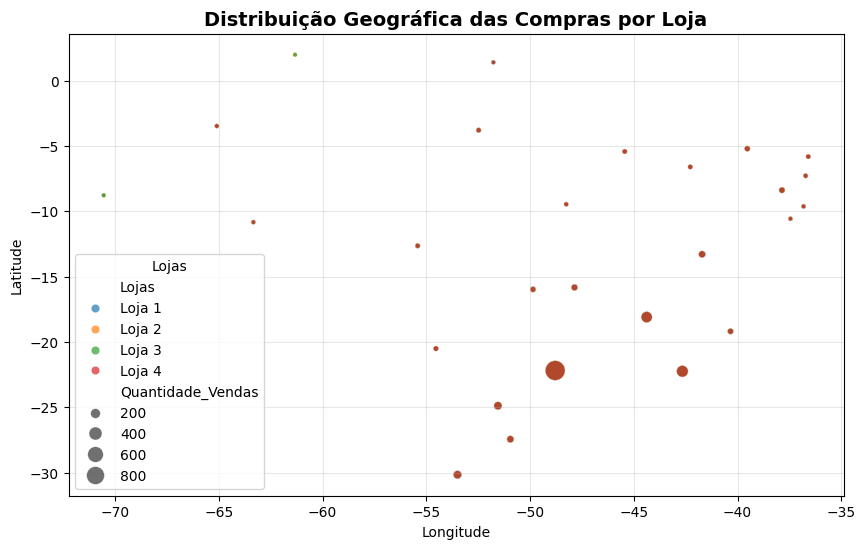

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e contar compras por loja e localização
compras_por_regiao = df_unificado.groupby(["lon", "lat", "Lojas"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Criar um mapa de calor para visualizar vendas por região
plt.figure(figsize=(10, 6))
sns.scatterplot(data=compras_por_regiao, x="lon", y="lat", hue="Lojas", size="Quantidade_Vendas", sizes=(10, 200), palette="tab10", alpha=0.7)

plt.title("Distribuição Geográfica das Compras por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Lojas")
plt.grid(alpha=0.3)

plt.show()

###Mapa de calor para destacar áreas de maior volume de vendas

Com o heatMap podemos visualizar regiões de alta concentração de compras.


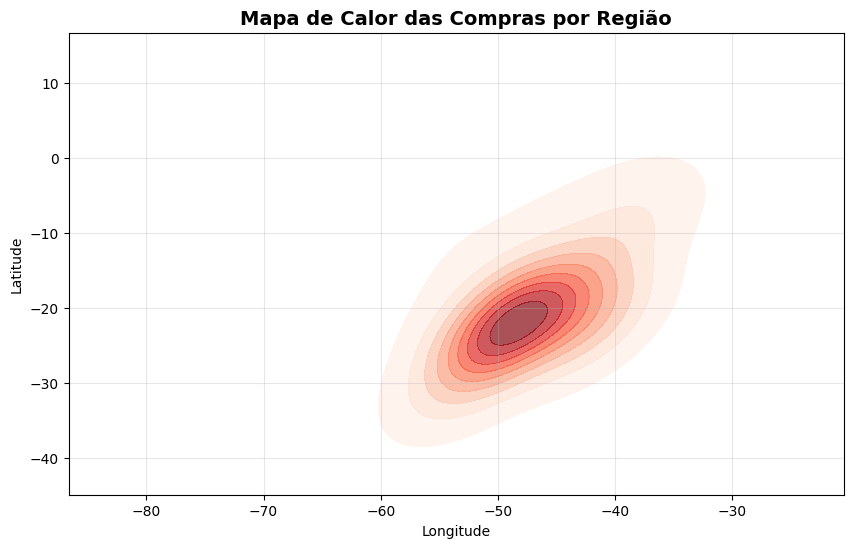

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e contar compras por coordenadas geográficas
compras_por_local = df_unificado.groupby(["lon", "lat"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Criar o mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(data=compras_por_local, x="lon", y="lat", weights="Quantidade_Vendas", cmap="Reds", fill=True, alpha=0.7)

plt.title("Mapa de Calor das Compras por Região", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)

plt.show()

#Relatório Final: ✅


##📖 1. O Desafio do Sr. João
Após anos no mercado, o Sr. João percebeu que era hora de inovar. Ele deseja iniciar um novo empreendimento, mas para isso precisa vender uma de suas lojas. A decisão não pode ser feita no impulso—ela deve ser fundamentada em dados. Qual das quatro unidades da Alura Store apresenta menor eficiência? Essa é a questão que guia esta análise.

###✔ Objetivo do relatório:
Este relatório tem como objetivo recomendar ao nosso cliente, Sr. João, qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. A análise descritiva dos dados ajudará a fornecer uma leitura clara e fundamentada do atual cenário do negócio, auxiliando na tomada de decisão.

###✔ Metodologia usada para análise

Os dados utilizados neste relatório foram extraídos do sistema de vendas da Alura Store. Foi realizado um filtro por loja que resultou em 4 arquivos CSVs, contendo as seguintes colunas em cada arquivo:
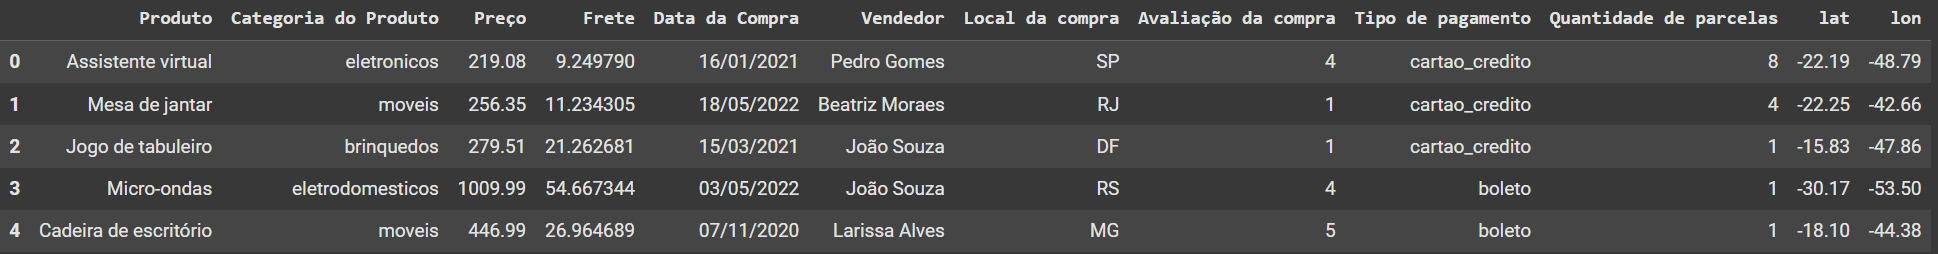



Os dados acima foram carregados e manipulados com a biblioteca Pandas.
A biblioteca Matplotlib foi usada para criar visualizações de dados juntamente com seaborn. Com essas ferramentas foi possivel analisar métricas como faturamento, avaliações e desempenho de vendas.

###✔ 📊 2. Investigando os Dados
Para responder a pergunta que tanto tem tirado o sono do Sr. João, analisamos diversos fatores: faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais e menos vendidos e por fim frete médio.
Para iniciar as análises foi criado um dataframe unificado com todas as lojas contendo a coluna "Lojas". Dessa forma facilitamos os calculos trabalhando criando dataframes especificos para cada tipo de análise, se necessário. O DataFrame unificado totalizou 9435 linhas e 13 colunas. Cada métrica nos aproxima de uma conclusão precisa. Afinal, a eficiência de uma loja vai muito além do faturamento bruto—envolve satisfação dos clientes, custos operacionais e sustentabilidade do negócio.
###2.1 Análise do faturamento

#####O gráfico abaixo "Faturamento Total por Loja" exibe o total de receita gerado por cada unidade da Alura Store, possibilitando uma comparação direta entre elas. A  Loja 1 tem o maior faturamento total: *R$`1,534,509.12`*, indicando forte desempenho financeiro. Já a Loja 4 tem o menor faturamento total:*R$`1,384,497.58`*, reforçando a tendência vista no gráfico anterior. A diferença entre as lojas é significativa, embora todas tenham faturamento na casa dos milhões, há um gap de quase **`R$ 150 mil`** entre a Loja 1 e a Loja 4.



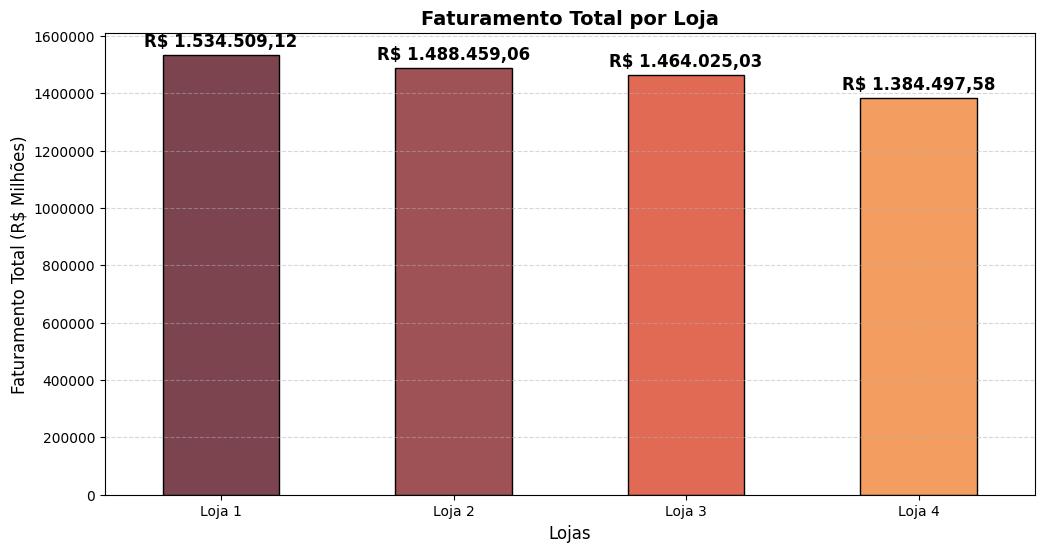

#####Combinando a informação acima com  o gráfico “Faturamento Médio por Loja” que mostra a média de receita em Reais, podemos interpretar que a loja 1 tem maior faturamento médio *`R$ 650,49`*, indicando que, em média, ela vende mais por transação, comparando com a Loja 4 que tem o menor faturamento médio de *`R$ 587,15`*, um indicativo de que pode ter dificuldades em gerar ticket alto por compra. Se queremos identificar a loja menos eficiente, esse gráfico sugere que a Loja 4 pode ser um forte candidata, pois apresenta menor faturamento médio por compra. Mas ainda é um pouco cedo para essa conclusão, será mesmo?






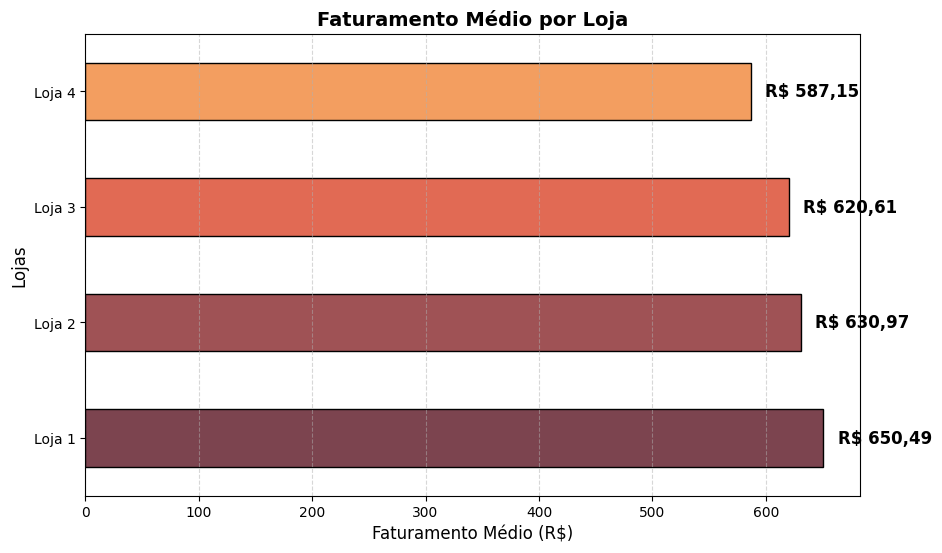

categorias mais vendidas, avaliações dos clientes, produtos mais e menos vendidos e por fim frete médio

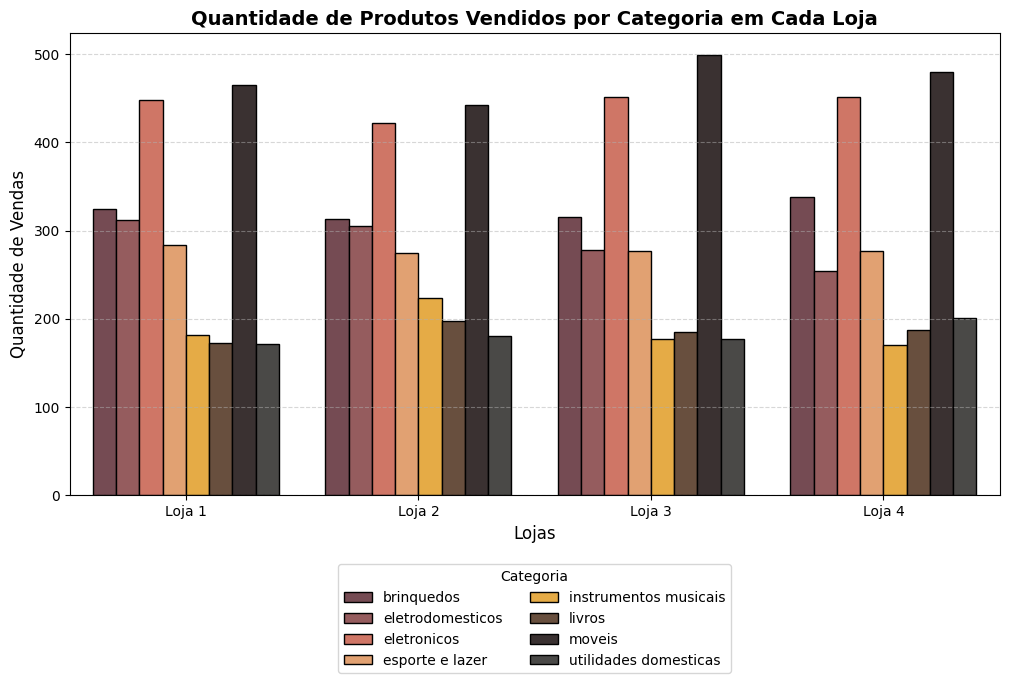

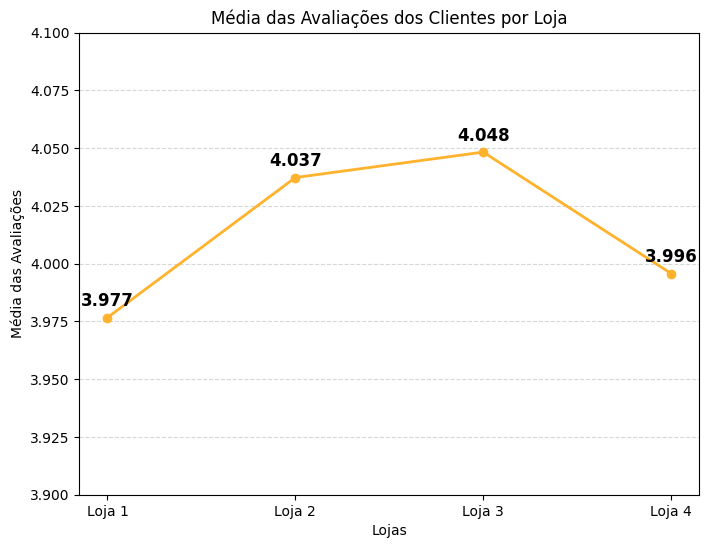

In [198]:
import os

print(os.listdir())  # Lista todos os arquivos no diretório

['.config', 'Distribuição_dos_Top_3Mais_Vendidos.png', 'sample_data']


In [199]:
import os

caminho_arquivo = os.path.abspath("Distribuição_dos_Top_3Mais_Vendidos.png")
print(caminho_arquivo)  # Exibe o caminho absoluto

/content/Distribuição_dos_Top_3Mais_Vendidos.png


![Distribuição_dos_Top_3Mais_Vendidos](/content/Distribuição_dos_Top_3Mais_Vendidos.png)

```

```





---



| Lojas   | Custo_Médio_Frete:   |
|:--------|:---------------------|
| Loja 1  | `R$ 34.69`             |
| Loja 2  | `R$ 33.62`            |
| Loja 3  | `R$ 33.07`              |
| Loja 4  | `R$ 31.28`             |


##🔍 3. Os Principais Insights
"Ao mergulhar nos dados, encontramos padrões claros. Algumas lojas possuem um fluxo constante de vendas, enquanto outras enfrentam desafios em retenção de clientes. A análise revelou quais unidades se destacam e quais apresentam sinais de baixa eficiência."






##🏆 4. A Loja Menos Eficiente
"Avaliando os indicadores, identificamos a loja com menor desempenho. Ela enfrenta dificuldades em conversão de vendas, possui um ticket médio inferior e recebe avaliações menos favoráveis dos clientes. Com base nessas descobertas, recomendamos ao Sr. João considerar a venda desta unidade."

##💡 5. Conclusão e Próximos Passos
"A decisão de vender uma loja é estratégica. Baseando-se em dados sólidos, o Sr. João pode tomar a melhor decisão para garantir um novo empreendimento de sucesso. Agora, com essa análise em mãos, ele está pronto para dar o próximo passo."